# Analysis of Suicide in India

[](http://) If you're having suicidal thoughts, please call suicide helpline! 

Suicide helpline numbers - http://www.suicide.org/international-suicide-hotlines.html


In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# read csv file

df = pd.read_csv(r"F:\\EDA Projects\\Suicides in India 2001-2012.csv")
df.head()


,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [12]:
df.duplicated().any()

False

In [3]:
df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
102804,Jharkhand,2003,Means_adopted,By coming under running vehicles/trains,Female,15-29,3
113336,Karnataka,2010,Causes,Cancer,Male,15-29,3
177148,Puducherry,2003,Means_adopted,By touching electric wires,Female,45-59,0
236838,West Bengal,2011,Professional_Profile,Service (Private),Female,0-14,0
43248,Chhattisgarh,2005,Professional_Profile,House Wife,Male,15-29,0
172888,Odisha,2008,Causes,Other Causes (Please Specity),Female,15-29,59
102224,Jharkhand,2002,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,0-14,0
53188,D & N Haveli,2011,Means_adopted,By coming under running vehicles/trains,Female,15-29,0
112362,Karnataka,2008,Causes,Other Prolonged Illness,Male,60+,239
230140,Uttarakhand,2011,Professional_Profile,Retired Person,Female,60+,0


In [14]:
df.Type_code.value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [4]:
len(df[df['Total'] == 0])

135481

In [5]:
df.State.value_counts()

Madhya Pradesh       6792
Karnataka            6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Bihar                6790
Haryana              6790
Chhattisgarh         6790
Kerala               6788
Uttar Pradesh        6787
Gujarat              6786
Tamil Nadu           6786
Assam                6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (Uts)           312
Total (States)        312
Name: State,

In [17]:
df.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

### Data Wrangling

<ul>
    <li> Rename State and Type like  'A & N Islands',   'A & N Islands (Ut)' </li>     
    <li> Drop rows whose total is zero</li>
    <li> Drop rows where state is "Total %"</li>    
</ul>    

In [6]:
# rename states

df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

In [7]:
df.State.value_counts()

Maharashtra          6792
Madhya Pradesh       6792
Karnataka            6792
Odisha               6791
Rajasthan            6791
Andhra Pradesh       6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Gujarat              6786
Tamil Nadu           6786
Jharkhand            6785
Tripura              6782
Delhi                6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

In [19]:
# rename Type

df.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
df.replace('By Other means (please specify)', 'By Other means', inplace=True)
df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)

In [20]:
# Drop rows where total is zero.

df = df.drop(df[df.Total==0].index)

In [21]:
df[df['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


In [22]:
df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

### EDA

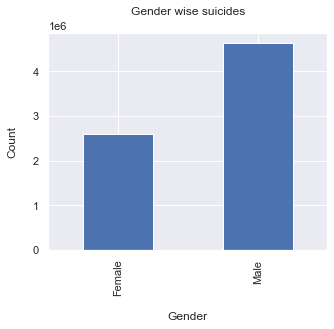

In [26]:
#Gender Suicide Frequency
gender = df.groupby('Gender').sum()['Total'].plot(kind="bar", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.cubehelix_palette(8);

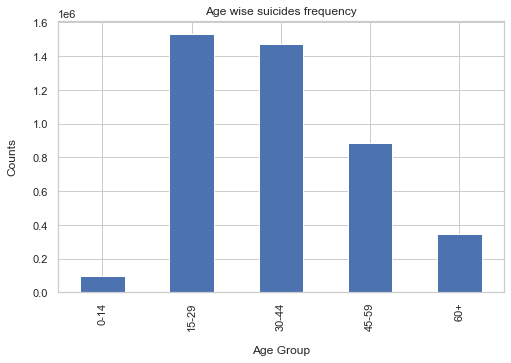

In [27]:
# Age Suicide Frequency
df_Age = df[df['Age_group']!='0-100+']

age = df_Age.groupby('Age_group').sum()['Total'].plot(kind="bar",figsize=(8,5), title ="Age wise suicides frequency");
age.set_xlabel('\nAge Group')
age.set_ylabel('Counts\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

Middle Age group i.e between 15-44 have the highest number but, It' scary that even kids between age of 0 - 14 also commit suicide.

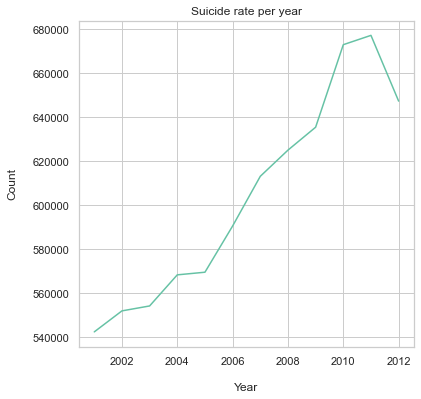

In [28]:
# Suicide rate every year

year = df.groupby('Year').sum()['Total'].plot(kind='line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

Suicide rate is sky rocketting from 2002 till almost 2010 but, it has droped from then.

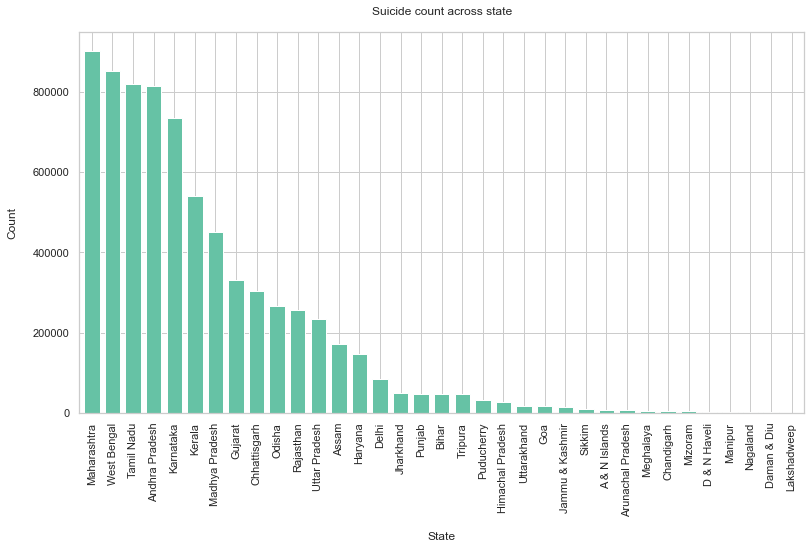

In [29]:
# State wise Suicide count

state = df.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)
state_fig = sort_state.plot(kind='bar', figsize = (13,7), title = 'Suicide count across state\n', width = 0.75)
state_fig.set_xlabel('\nState')
state_fig.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

Maharashtra, West Bengal and Tamil Nadu have the highest rate of suicide. 

In [8]:
# split df ny it's type code

cause = df[df['Type_code'] == 'Causes']
edu_status = df[df['Type_code'] == 'Education_Status']
means_adpt = df[df['Type_code'] == 'Means_adopted']
prof = df[df['Type_code'] == 'Professional_Profile']
soc_status = df[df['Type_code'] == 'Social_Status']

In [9]:
# function to plot

def plot_type(df, Title, X_lab):
    p_type = df.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending = False)

    fig = sort_df.plot(kind='bar', figsize = (10,6), title = Title + '\n', width = 0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');   

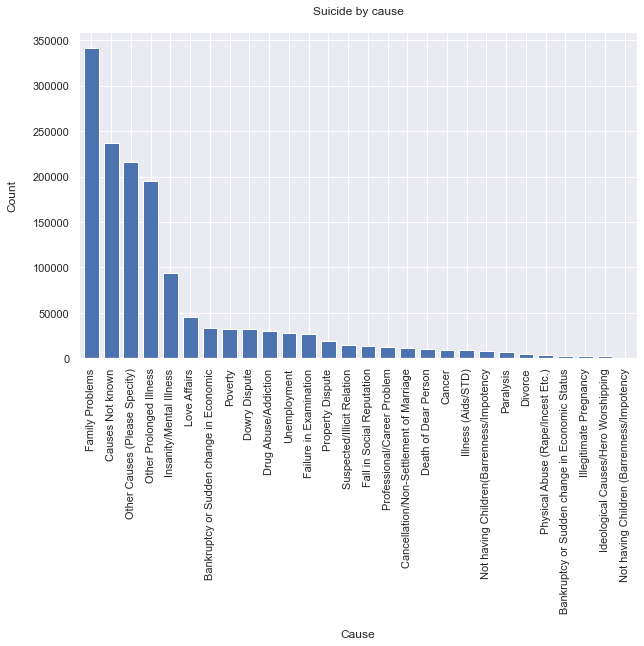

In [10]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')

Most of the cause are unknown but Family problems and Prolonged illness is at the top.

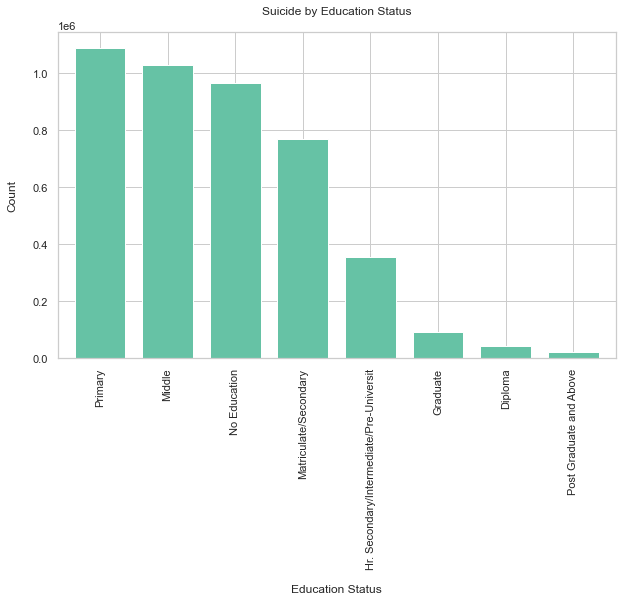

In [12]:
# plot by education status
plot_type(edu_status, 'Suicide by Education Status', 'Education Status')

People with primary or no education are high in number.

In [ ]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')

Hanging, Consuming Insecticides is more common but, most of other means are unknown.

In [ ]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')

Most of the professional profile is unknown but house wife comes in second.

In [ ]:
# suicide by social Status
plot_type(soc_status, 'Suicide by Social Status', 'Social Status',)

Family Problems, House Wife and now Married these are at the top when it comes to the cause, professional profile and social status respectively.

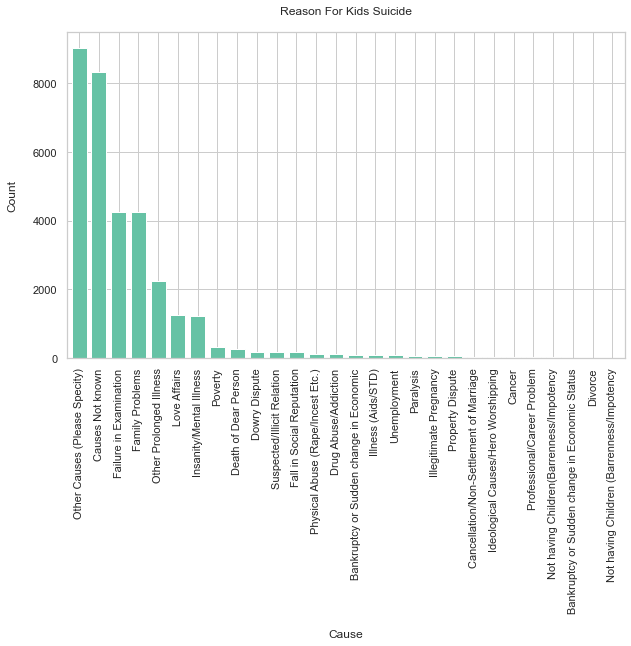

In [13]:
age_lower = df[df['Age_group']== '0-14']
age_lower_cause = age_lower[age_lower['Type_code'] == 'Causes']
plot_type(age_lower_cause, 'Reason For Kids Suicide', 'Cause')

Most of cause is unknown but, Failure in Examination is at the top.

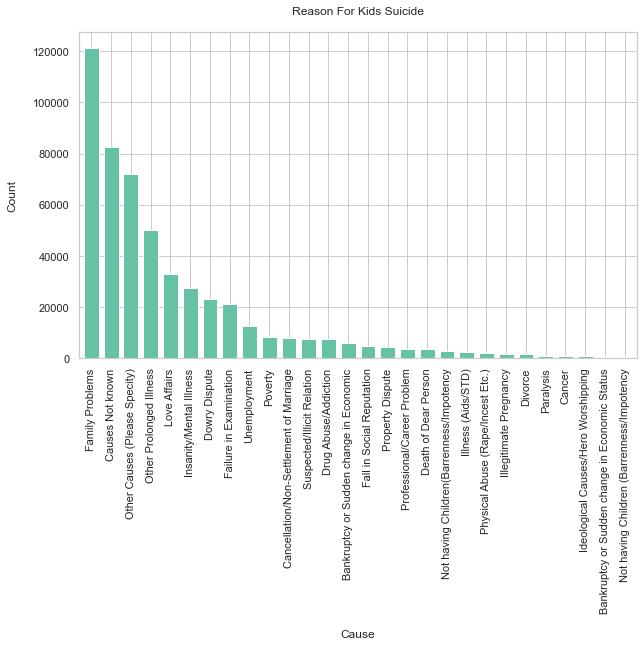

In [14]:
age_middle = df[df['Age_group']== '15-29']
age_middle_cause = age_middle[age_middle['Type_code'] == 'Causes']
plot_type(age_middle_cause, 'Reason For Kids Suicide', 'Cause')

Family Problems, Illness and Love affairs are at the top while, most of the reasons are unknown yet.

## Conclusion
*  Age group between 15-44 has the highest number of suicides.
*  Rate of suicide sky rocketed from 2002-2010 but since 2011 it has been decreasing but, since we have the data till 2012 we can't confim the pattern.
*  Maharashtra, West Bengal and Tamil Nadu have the highest suicide rate this might also be because of the high population in these states.
*  Family Problems, Illness, Mental Illness are some of the main reason while most of the reasons are still unknown.
*  Hanging, Consuming Insecticides is more common but, most of other means are unknown.
* Most of the professional profile is unknown but house wife comes in second, while Farming comes in at third.
* Married is at the top when it comes to social status while never married is at second.
*  The reason for suicide at the age group between 0-14  is because of Failure in Examination.
*  The reason for suicide at the age group between 15-29 is because of Family Problems.
